## Problem Description
A multinational corporation is facing challenges with employee turnover, and the Human Resources team needs a predictive model to identify which employees are more likely to leave the company (churn or turnover). The goal is to enable strategic decisions that reduce turnover, enhancing employee retention and satisfaction.

## Objective
In this initial phase, the focus is to explore the provided dataset, understand its variables, identify patterns, and perform the necessary cleaning to prepare the data for training predictive models. The final goal is to train and evaluate models such as Logistic Regression, Random Forest, and a Deep Learning model to predict turnover.

## Dataset
The dataset contains extensive information about employees, including:
- `JobInvolvement` (job involvement)
- `Education` (education level)
- `JobSatisfaction` (job satisfaction)
- `PerformanceRating` (performance rating)
- `RelationshipSatisfaction` (relationship satisfaction)
- `WorkLifeBalance` (work-life balance)

The dataset source is Kaggle: [HR Analytics: Attrition Dataset](https://www.kaggle.com/pavansubhashht/hr-analytics-attrition-dataset).

In [247]:
from cProfile import label

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from keras.src.layers import average
from tensorboard.notebook import display

In [248]:
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
from IPython.display import display
display(employee_df)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [249]:
# Age must have an impact on the tendecy to stay or leave
# Distance from Home must have an impact on the tendecy to stay or leave
# MaritalStatus must have an impact on the tendecy leave if you re single
# MonthlyIncome must have an impact on the tendecy to stay if emplyees a getting paid well
# NumCompaniesWorked must have a impact on the tendecy to leave if the num is high
# PerformanceRating  must have a impact on the tendecy to leave if receiving better offers
# Satisfaction  must have a impact on the tendecy to satay if well satisfacted
# StockOptionLevel  must have a impact on the tendecy to stay if the stock is locked up to a certain time


In [250]:
display(employee_df.head(5))
employee_df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [251]:
employee_df.info()
# we have 26 int64 and 9 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [252]:
employee_df.describe()
# The avarage age is 36.9

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [253]:
"""Exploring the dataset"""

# Replacing Yes and No with 1 and 0 --> Attrition, Over18 and OverTime.
# print(pd.options.display.max_columns) 20 columns max
pd.set_option('display.max_columns', None)
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [254]:
# Replacing Yes and No with 1 and 0 --> Attrition, Over18 and OverTime.

""" employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
employee_df.head(10) 
"""
print(employee_df['Attrition'].unique())

['Yes' 'No']


In [255]:
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')

""" Analyzing Attrition attribute"""

# First I'll check the unique values in Attrition
print("Valores únicos em 'Attrition' após recarregar:")
print(employee_df['Attrition'].unique())

# Now applying the lambd function with .str.strip().str.upper() to ensure no errors occur
employee_df['Attrition'] = employee_df['Attrition'].str.strip().str.upper().apply(lambda x: 1 if x == 'YES' else 0)

# Checking results
print("Valores únicos após a lambda:")
print(employee_df['Attrition'].unique())

print("Contagem após a lambda:")
print(employee_df['Attrition'].value_counts())
employee_df.head(5)

Valores únicos em 'Attrition' após recarregar:
['Yes' 'No']
Valores únicos após a lambda:
[1 0]
Contagem após a lambda:
Attrition
0    1233
1     237
Name: count, dtype: int64


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [256]:
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')


# Now for the Over18 and OverTime columns:

employee_df['Over18'] = employee_df['Over18'].str.strip().str.upper().apply(lambda x: 1 if x == 'Y' else 0)
# pd.set_option('display.max_columns', None)
print("--Over18--")
display(employee_df['Over18'].unique())
display(employee_df['Over18'].value_counts())

# OverTime
employee_df['OverTime'] = employee_df['OverTime'].str.strip().apply(lambda x: 1 if x == 'Yes' else 0)
print("--OverTime--")
display(employee_df['OverTime'].unique())
display(employee_df['OverTime'].value_counts())

--Over18--


array([1])

Over18
1    1470
Name: count, dtype: int64

--OverTime--


array([1, 0])

OverTime
0    1054
1     416
Name: count, dtype: int64

<Axes: >

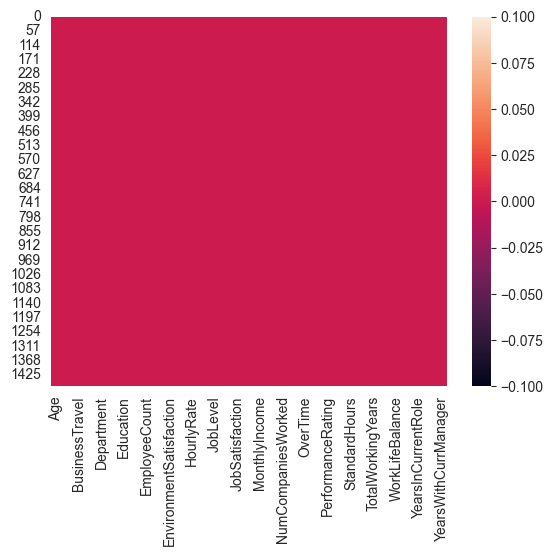

In [257]:
""" Checking missing data """

employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
sns.heatmap(employee_df.isnull())

In [258]:
# Transformando dados categoricos binarios agora:

employee_df['Over18'] = employee_df['Over18'].str.strip().str.upper().apply(lambda x: 1 if x == 'Y' else 0)
employee_df['OverTime'] = employee_df['OverTime'].str.strip().apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Attrition'] = employee_df['Attrition'].str.strip().str.upper().apply(lambda x: 1 if x == 'YES' else 0)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

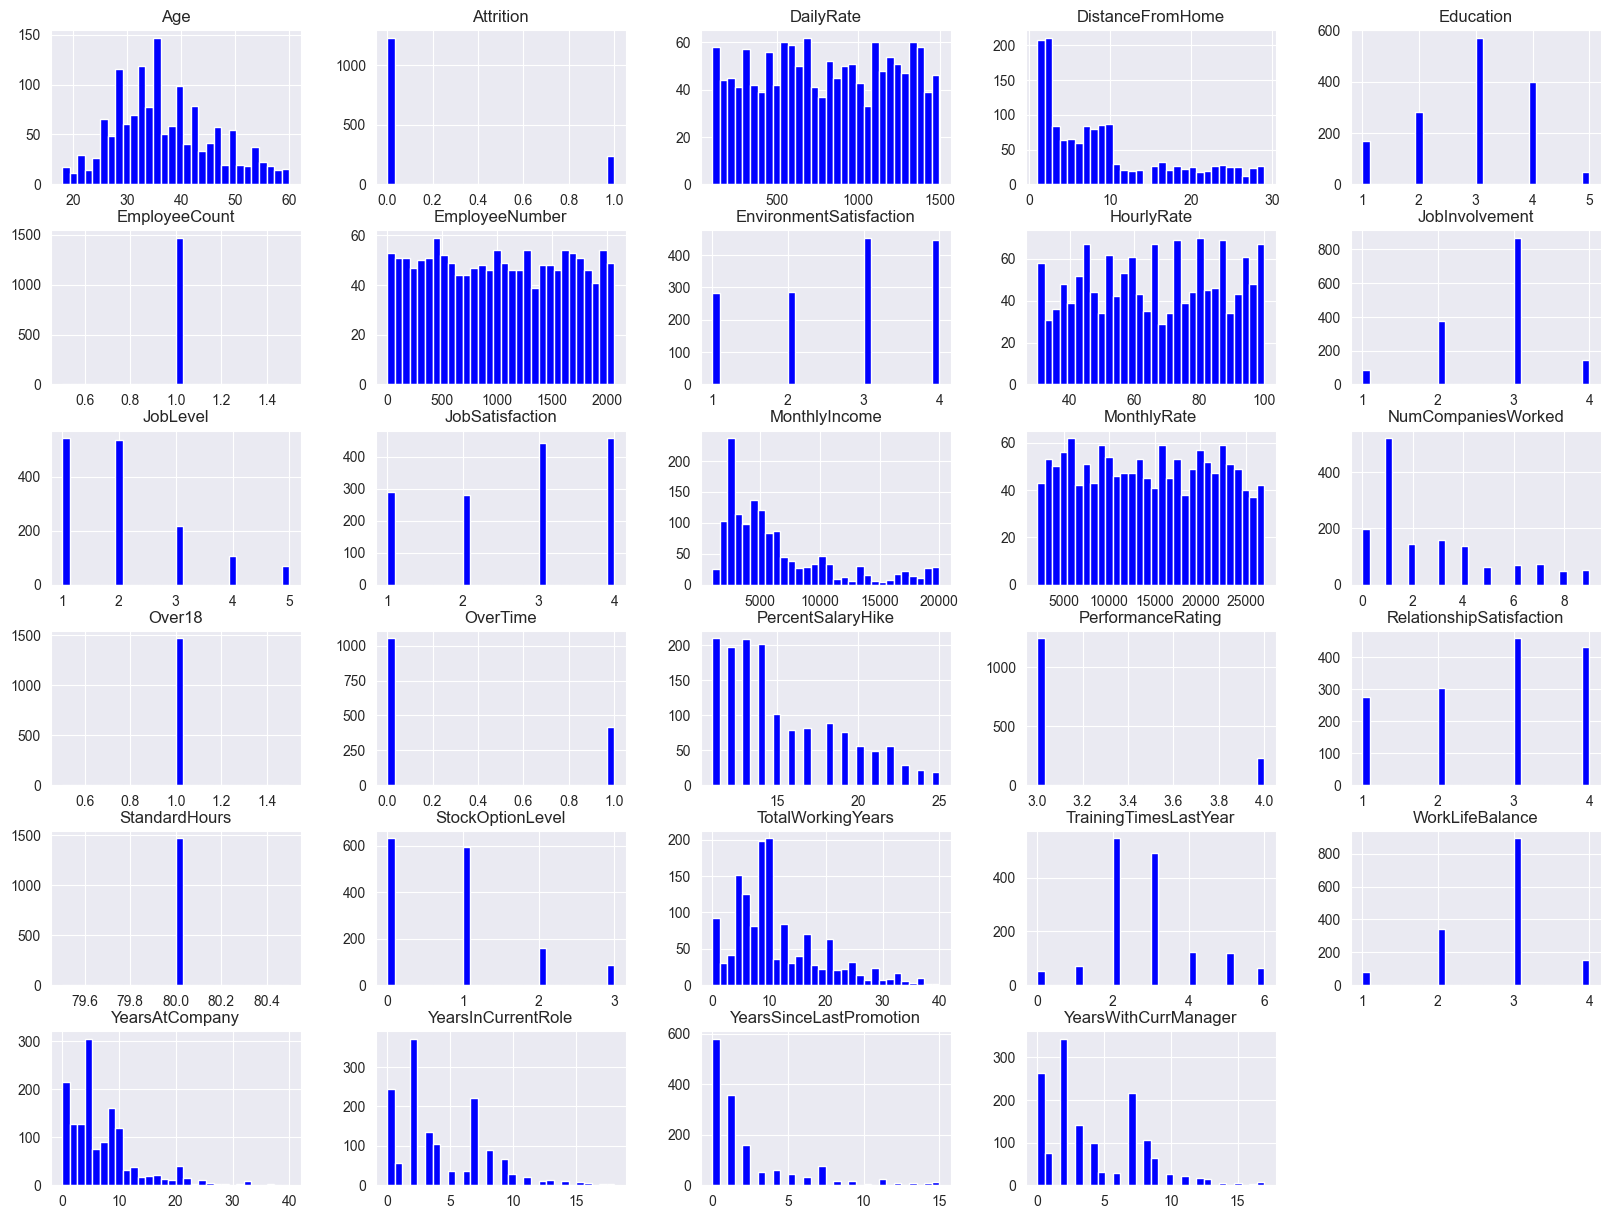

In [259]:
# I ll generate graphs that provide a general overview of each numerical attribute and the target variable in the dataset.

employee_df.hist(bins=30, figsize=(20, 15), color = 'b')

In [260]:
# Calculating the average salary:
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
average_salary = employee_df[employee_df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
print(f'Average month salary of workers that turnover is: {average_salary}')

average_salary = employee_df[employee_df['Attrition'] == 'No']['MonthlyIncome'].mean()
print(f'Average month salary of workers that stay is: {average_salary}')

average_salary = employee_df['MonthlyIncome'].mean() # General mean of all workers
print(f'Average month salary of all workers is: {average_salary}')

Average month salary of workers that turnover is: 4787.0928270042195
Average month salary of workers that stay is: 6832.739659367397
Average month salary of all workers is: 6502.931292517007


In [261]:
# Droping  EmployeeCount, EmployeeNumber, Over18, and StandardHours because all are constants

employee_df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True) # changing the data frame in memory


In [262]:
employee_df.shape

(1470, 31)

In [263]:
# converter as colunas categóricas em valores numéricos

"""
BusinessTravel: Nível de viagem de negócios do funcionário (Baixo, Médio, Alto).
Department: Departamento em que o funcionário trabalha (Vendas, Pesquisa e Desenvolvimento, RH).
EducationField: Área de educação do funcionário (Ciências da Vida, Marketing, Medicina, etc.).
Gender: Gênero do funcionário (Masculino, Feminino).
JobRole: Cargo do funcionário (Gerente, Representante de Vendas, Técnico de Laboratório, etc.).
MaritalStatus: Estado civil do funcionário (Solteiro, Casado, Divorciado).
"""

# Usando o Onehotencoder
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(handle_unknown='ignore', dtype='int32')

In [264]:
'''Fazendo os fit das 6 clunas categoticas dps da conversão'''

'Fazendo os fit das 6 clunas categoticas dps da conversão'

In [265]:
# Fazendo fit com a coluna BusinessTravel dps transformo em um dataframe e entao uso concat para adicionar a employeedf

one = one.fit(employee_df[['BusinessTravel']])
one.transform(employee_df[['BusinessTravel']]).toarray()

one_df = pd.DataFrame(one.transform(employee_df[['BusinessTravel']]).toarray(),columns=one.get_feature_names_out())

employee_df = pd.concat([employee_df, one_df], axis=1)
one_df.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [266]:
one = one.fit(employee_df[['Department']])
one.transform(employee_df[['Department']]).toarray()

one_df = pd.DataFrame(one.transform(employee_df[['Department']]).toarray(), columns=one.get_feature_names_out())

employee_df = pd.concat([employee_df, one_df], axis=1)
one_df.head(5)


,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [267]:
"""Agora em vez de fazer de 1 em 1 vou usar um for pra iterar cada coluna e aplicar o OneHot para cada um e dps junto os dados transformados no employee_df"""

for col in ['EducationField', 'Gender', 'JobRole', 'MaritalStatus']:
    one = one.fit(employee_df[[col]])
    one.transform(employee_df[[col]]).toarray()

    one_df = pd.DataFrame(one.transform(employee_df[[col]]).toarray(), columns=one.get_feature_names_out())

    employee_df = pd.concat([employee_df, one_df], axis=1)

one_df.head(5)

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [268]:
print(employee_df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationF

In [269]:
"""
# Para confirmar que funcionou a transformação e o concat

employee_df.filter(like='EducationField').head(5)
employee_df.filter(like='Gender').head(5)
employee_df.filter(like='JobRole').head(5)
employee_df.filter(like='MaritalStatus').head(5)

"""


"\n# Para confirmar que funcionou a transformação e o concat\n\nemployee_df.filter(like='EducationField').head(5)\nemployee_df.filter(like='Gender').head(5)\nemployee_df.filter(like='JobRole').head(5)\nemployee_df.filter(like='MaritalStatus').head(5)\n\n"

In [270]:
# Apagando as colunas categóricas originais já tratadas.

employee_df = employee_df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis=1)

In [271]:
# Criando 2 Dataframes para separar os funcionarios que sairam:
# employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
employee_df['Attrition'] = employee_df['Attrition'].str.strip().str.upper().apply(lambda x: 1 if x == 'YES' else 0)
employee_df['OverTime'] = employee_df['OverTime'].str.strip().apply(lambda x: 1 if x == 'Yes' else 0)

left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

print(f'Number of employees who left: {len(left_df)}')
print(f'Number of employees who stayed: {len(stayed_df)}')

Number of employees who left: 237
Number of employees who stayed: 1233


In [272]:

print(f'Total number of employees: {len(employee_df)}')
print(f'Number of employees who left: {len(left_df)}')
print(f'Number of employees who stayed: {len(stayed_df)}')

print(f'% of employees who left = {1. * len(left_df) / len(employee_df) * 100:.2f}%')
print(f'% of employees who have stayed = {1. * len(stayed_df) / len(employee_df) * 100:.2f}%')

Total number of employees: 1470
Number of employees who left: 237
Number of employees who stayed: 1233
% of employees who left = 16.12%
% of employees who have stayed = 83.88%


In [273]:
# Descrição dos que ficaram
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.111922,0.168694,0.719384,0.041363,0.671533,0.287105,0.016221,0.419303,0.100568,0.325223,0.057583,0.081103,0.406326,0.593674,0.098946,0.032441,0.159773,0.078670,0.109489,0.063260,0.198702,0.218167,0.040552,0.238443,0.477697,0.283861
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116,0.315399,0.374634,0.449483,0.199208,0.469846,0.452594,0.126374,0.493645,0.300878,0.468648,0.233048,0.273104,0.491346,0.491346,0.298710,0.177241,0.366544,0.269332,0.312379,0.243529,0.399185,0.413169,0.197329,0.426304,0.499705,0.451053
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [274]:
# Descrição dos que saíram
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,0.050633,0.291139,0.658228,0.050633,0.561181,0.388186,0.029536,0.375527,0.147679,0.265823,0.046414,0.135021,0.367089,0.632911,0.037975,0.050633,0.261603,0.021097,0.042194,0.008439,0.198312,0.240506,0.139241,0.139241,0.354430,0.506329
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349,0.219711,0.455249,0.475307,0.219711,0.497293,0.488369,0.169661,0.485284,0.355533,0.442705,0.210824,0.342469,0.483031,0.483031,0.191540,0.219711,0.440438,0.144012,0.201457,0.091668,0.399572,0.428295,0.346930,0.346930,0.479353,0.501018
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,39.000000,1.0,1092.000000,17.0000

In [275]:
# Vou verificar  se ainda existem valores categóricos em employee

employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

<Axes: >

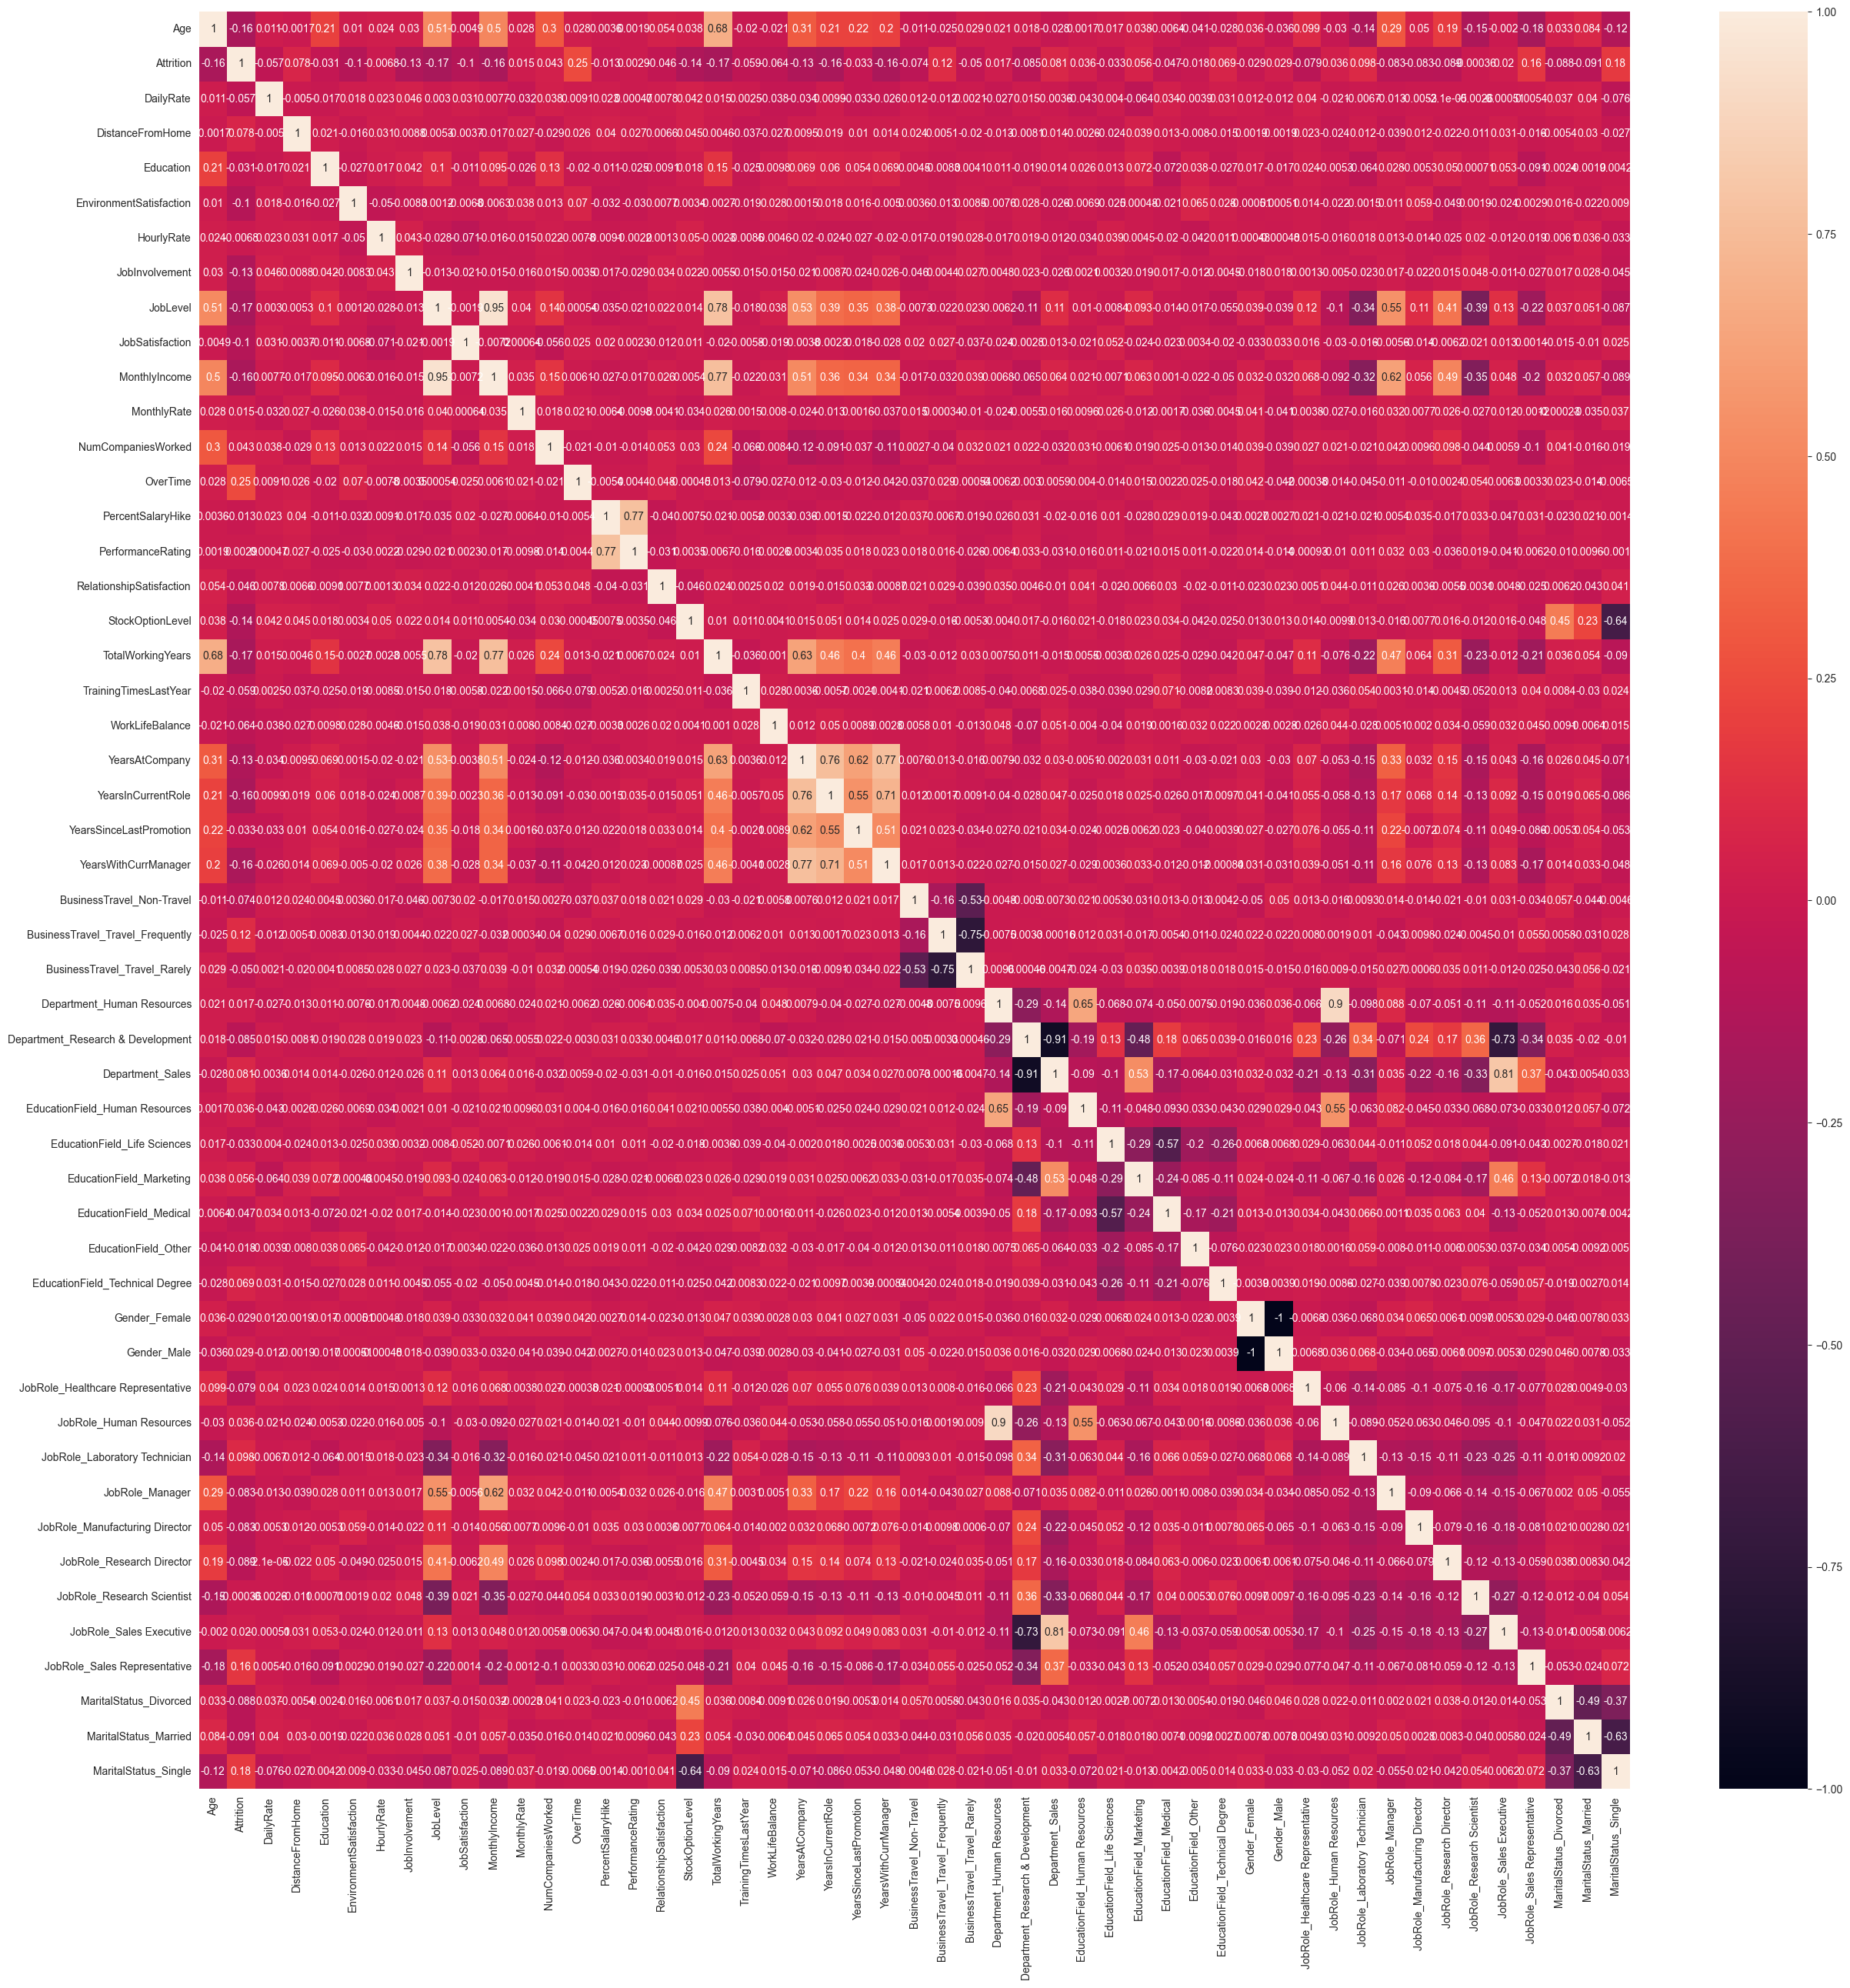

In [276]:
# Verificando as correlações:

correlacoes = employee_df.corr()
fig, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(correlacoes, annot=True)

In [277]:
"""Calculando as correlações com o atributo alvo 'Attrition'"""

correlations = employee_df.drop(columns=['Attrition']).apply(lambda x: x.corr(employee_df['Attrition']))

# Obtendo as top 15 maiores correlações
best_correlations = correlations.abs().nlargest(15)

print(best_correlations)

best_correlations = best_correlations.index.tolist() #pegando os nomes das respectivas melhores colunas
print(best_correlations)

OverTime                            0.246118
MaritalStatus_Single                0.175419
TotalWorkingYears                   0.171063
JobLevel                            0.169105
YearsInCurrentRole                  0.160545
MonthlyIncome                       0.159840
Age                                 0.159205
JobRole_Sales Representative        0.157234
YearsWithCurrManager                0.156199
StockOptionLevel                    0.137145
YearsAtCompany                      0.134392
JobInvolvement                      0.130016
BusinessTravel_Travel_Frequently    0.115143
JobSatisfaction                     0.103481
EnvironmentSatisfaction             0.103369
dtype: float64
['OverTime', 'MaritalStatus_Single', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'JobRole_Sales Representative', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement', 'BusinessTravel_Travel_Frequently', 'JobSatisfaction', 'EnvironmentSatisfaction']


### 🔹 **Principais Correlações com a variável-alvo:**
1. **OverTime** → 0.25
2. **MaritalStatus_Single** → 0.18
3. **TotalWorkingYears** → 0.17
4. **JobLevel** → 0.17
5. **YearsInCurrentRole** → 0.16
6. **MonthlyIncome** → 0.16
7. **Age** → 0.16
8. **JobRole_Sales Representative** → 0.16
9. **YearsWithCurrManager** → 0.16
10. **StockOptionLevel** → 0.14
11. **YearsAtCompany** → 0.13
12. **JobInvolvement** → 0.13
13. **BusinessTravel_Travel_Frequently** → 0.12
14. **JobSatisfaction** → 0.10
15. **EnvironmentSatisfaction** → 0.10

### 📌 **Principais variáveis identificadas:**
`['OverTime', 'MaritalStatus_Single', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'JobRole_Sales Representative', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement', 'BusinessTravel_Travel_Frequently', 'JobSatisfaction', 'EnvironmentSatisfaction']`


<Axes: xlabel='OverTime', ylabel='Density'>

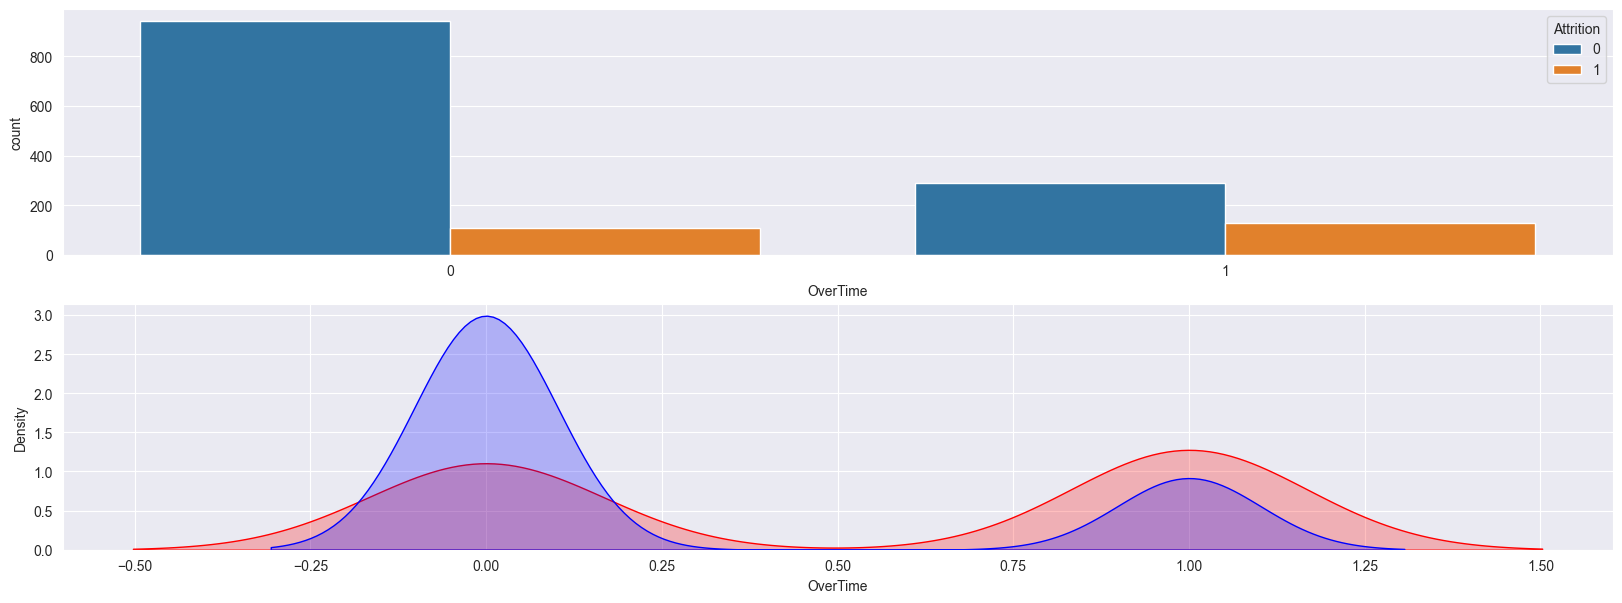

In [278]:
plt.figure(figsize=(20, 30))

# Primeiro subplot: Countplot
plt.subplot(811)
sns.countplot(x='OverTime', hue='Attrition', data=employee_df)  # Usando 'Gender' como hue

# Segundo subplot: KDE plot
plt.subplot(812)
sns.kdeplot(left_df['OverTime'], label='Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['OverTime'], label='Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='MaritalStatus_Single', ylabel='Density'>

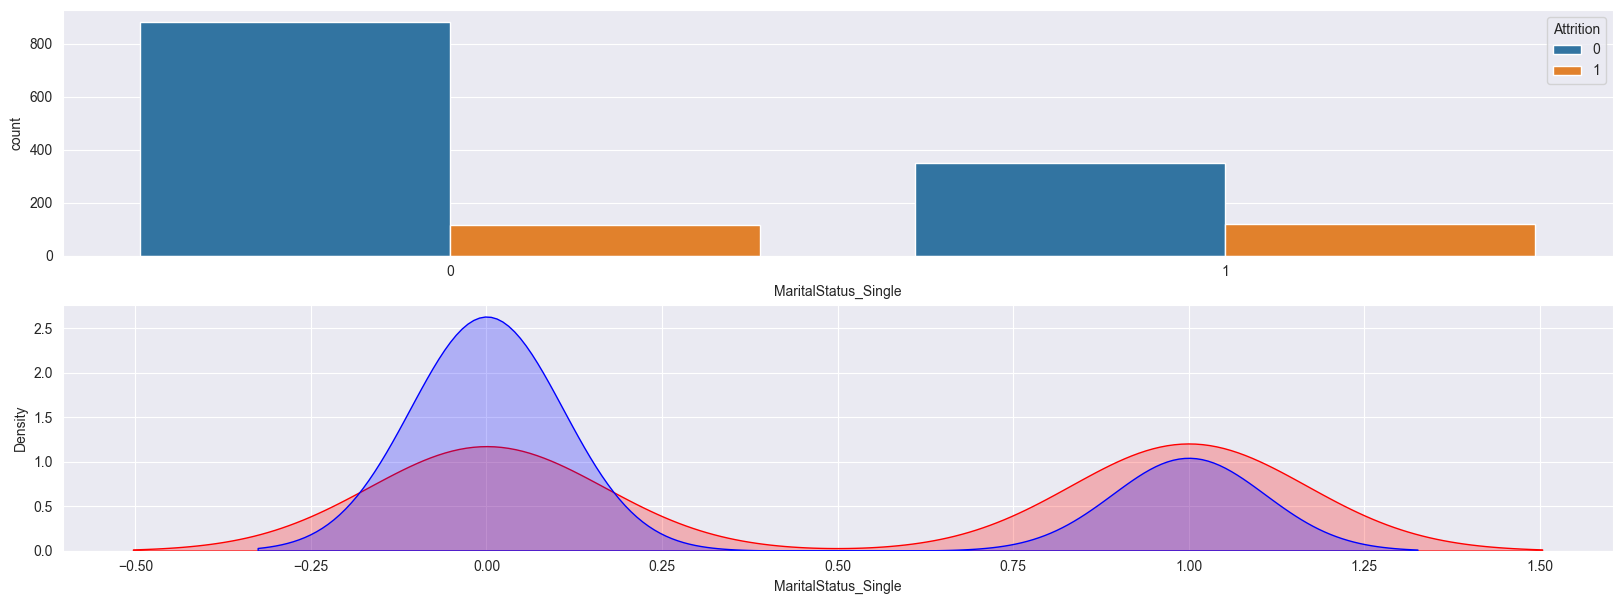

In [279]:
plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x='MaritalStatus_Single', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['MaritalStatus_Single'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['MaritalStatus_Single'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

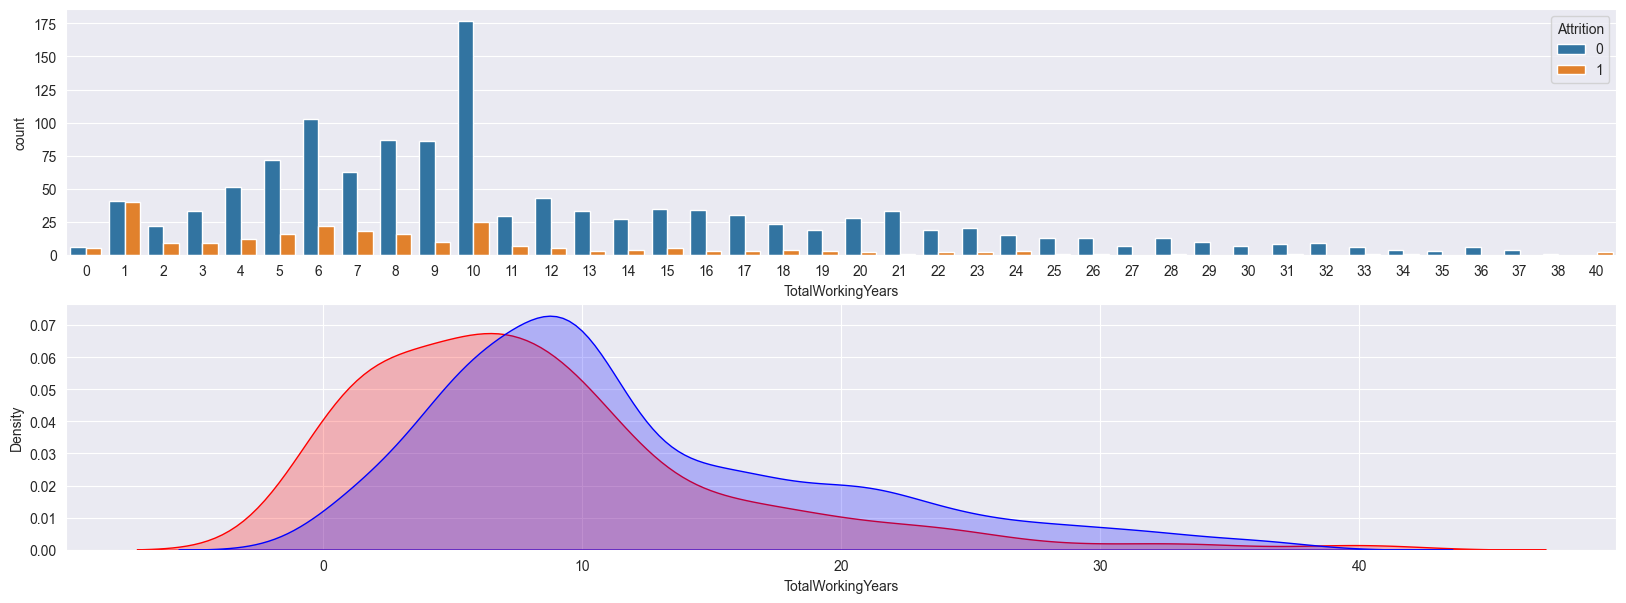

In [280]:
plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionários que ficaram', fill=True, color='b')

In [ ]:
"""Continuar aq JobLevel"""
plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'JobLevel', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['JobLevel'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['JobLevel'], label = 'Funcionários que ficaram', fill=True, color='b')

Top 15 Correlações com Attrition:
TotalWorkingYears          0.171063
JobLevel                   0.169105
YearsInCurrentRole         0.160545
MonthlyIncome              0.159840
Age                        0.159205
YearsWithCurrManager       0.156199
StockOptionLevel           0.137145
YearsAtCompany             0.134392
JobInvolvement             0.130016
JobSatisfaction            0.103481
EnvironmentSatisfaction    0.103369
DistanceFromHome           0.077924
WorkLifeBalance            0.063939
TrainingTimesLastYear      0.059478
DailyRate                  0.056652
dtype: float64

Colunas mais correlacionadas:
['TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction', 'DistanceFromHome', 'WorkLifeBalance', 'TrainingTimesLastYear', 'DailyRate']


D:\GitHub Desktop\HR-Analytics\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\GitHub Desktop\HR-Analytics\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


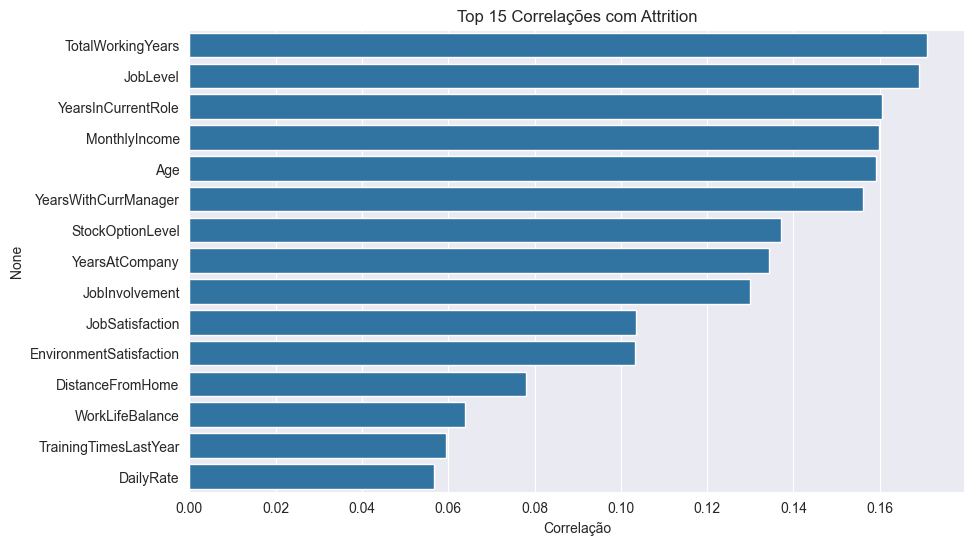

In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o arquivo CSV
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')

# Convertendo Attrition para numérico
employee_df['Attrition'] = employee_df['Attrition'].map({'No': 0, 'Yes': 1})

# Calculando as correlações com o alvo apenas para colunas numéricas
numeric_df = employee_df.drop(columns=['Attrition']).select_dtypes(include=['int64', 'float64'])
correlations = numeric_df.apply(lambda x: x.corr(employee_df['Attrition']))

# Obtendo as 15 maiores correlações
top_correlations = correlations.abs().nlargest(15)  # Selecionando as 15 maiores correlações em valor absoluto

# Verificando quais são as 15 top correlações entre os atributos e o target
print("Top 15 Correlações com Attrition:")
print(top_correlations)

# Obtendo os nomes das colunas correspondentes às maiores correlações
top_columns = top_correlations.index.tolist()
print("\nColunas mais correlacionadas:")
print(top_columns)

# Visualização
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlations.values, y=top_correlations.index)
plt.title('Top 15 Correlações com Attrition')
plt.xlabel('Correlação')
plt.show()

In [282]:
# Após carregar o DataFrame
numeric_df = employee_df.drop(columns=['Attrition']).select_dtypes(include=['int64', 'float64'])

# Verificando colunas com desvio padrão zero
zero_std_columns = numeric_df.columns[numeric_df.std() == 0]
print("Colunas com desvio padrão zero (todos os valores iguais):")
print(zero_std_columns.tolist())

# Verificando colunas com NaN
nan_columns = numeric_df.columns[numeric_df.isna().any()]
print("\nColunas com valores NaN:")
print(nan_columns.tolist())

Colunas com desvio padrão zero (todos os valores iguais):
['EmployeeCount', 'StandardHours']

Colunas com valores NaN:
[]


In [283]:
"""
Agora vou focar as análises nas 15 correlações principais (atributos que mais impactam) com a variável alvo(Attrition)
O Relatório estará ao final dos 15 gráficos
"""

"""
Top 15 Correlações com Attrition:
TotalWorkingYears          0.171063
JobLevel                   0.169105
YearsInCurrentRole         0.160545
MonthlyIncome              0.159840
Age                        0.159205
YearsWithCurrManager       0.156199
StockOptionLevel           0.137145
YearsAtCompany             0.134392
JobInvolvement             0.130016
JobSatisfaction            0.103481
EnvironmentSatisfaction    0.103369
DistanceFromHome           0.077924
WorkLifeBalance            0.063939
TrainingTimesLastYear      0.059478
DailyRate                  0.056652

"""

'\nTop 15 Correlações com Attrition:\nTotalWorkingYears          0.171063\nJobLevel                   0.169105\nYearsInCurrentRole         0.160545\nMonthlyIncome              0.159840\nAge                        0.159205\nYearsWithCurrManager       0.156199\nStockOptionLevel           0.137145\nYearsAtCompany             0.134392\nJobInvolvement             0.130016\nJobSatisfaction            0.103481\nEnvironmentSatisfaction    0.103369\nDistanceFromHome           0.077924\nWorkLifeBalance            0.063939\nTrainingTimesLastYear      0.059478\nDailyRate                  0.056652\n\n'

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

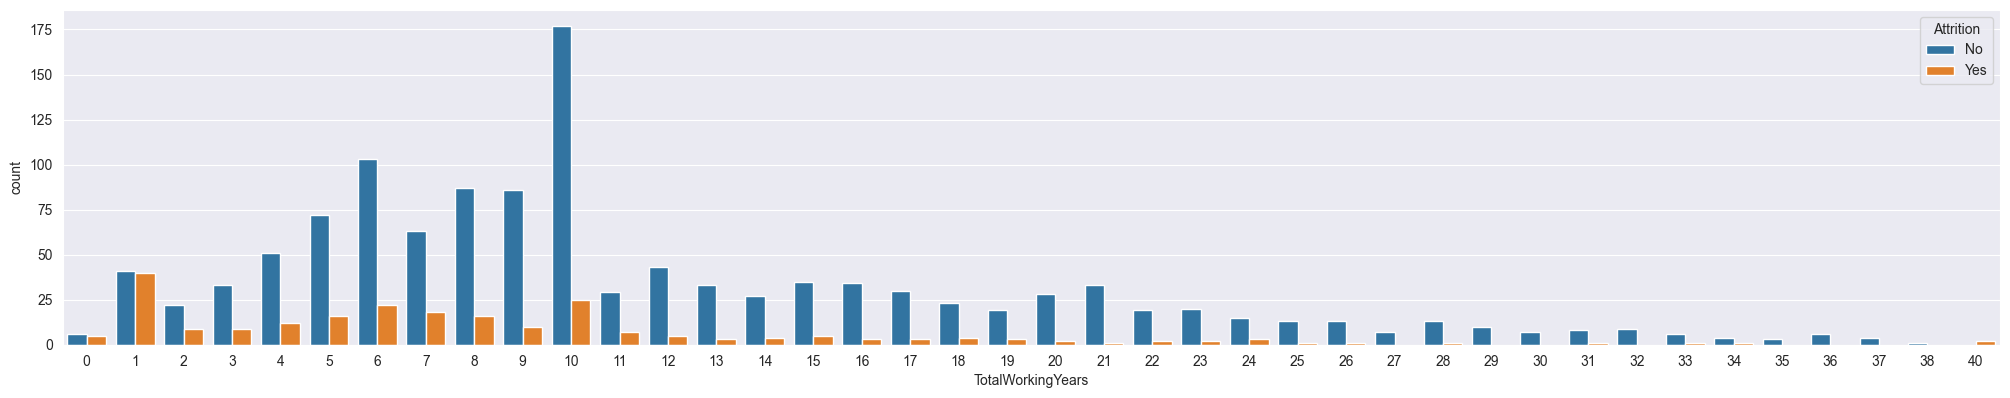

In [284]:
# Grafico da relação de 'TotalWorkingYears' com Attrition

employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
plt.figure(figsize=(25, 20))

plt.subplot(414)
sns.countplot(x = 'TotalWorkingYears', hue= 'Attrition', data = employee_df)

# sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', fill = True, color = 'r') #OBS: Shade is deprecated!
# sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who stayed', fill = True, color = 'b')
# plt.xlabel('Distance from Home')

<Axes: xlabel='Age', ylabel='count'>

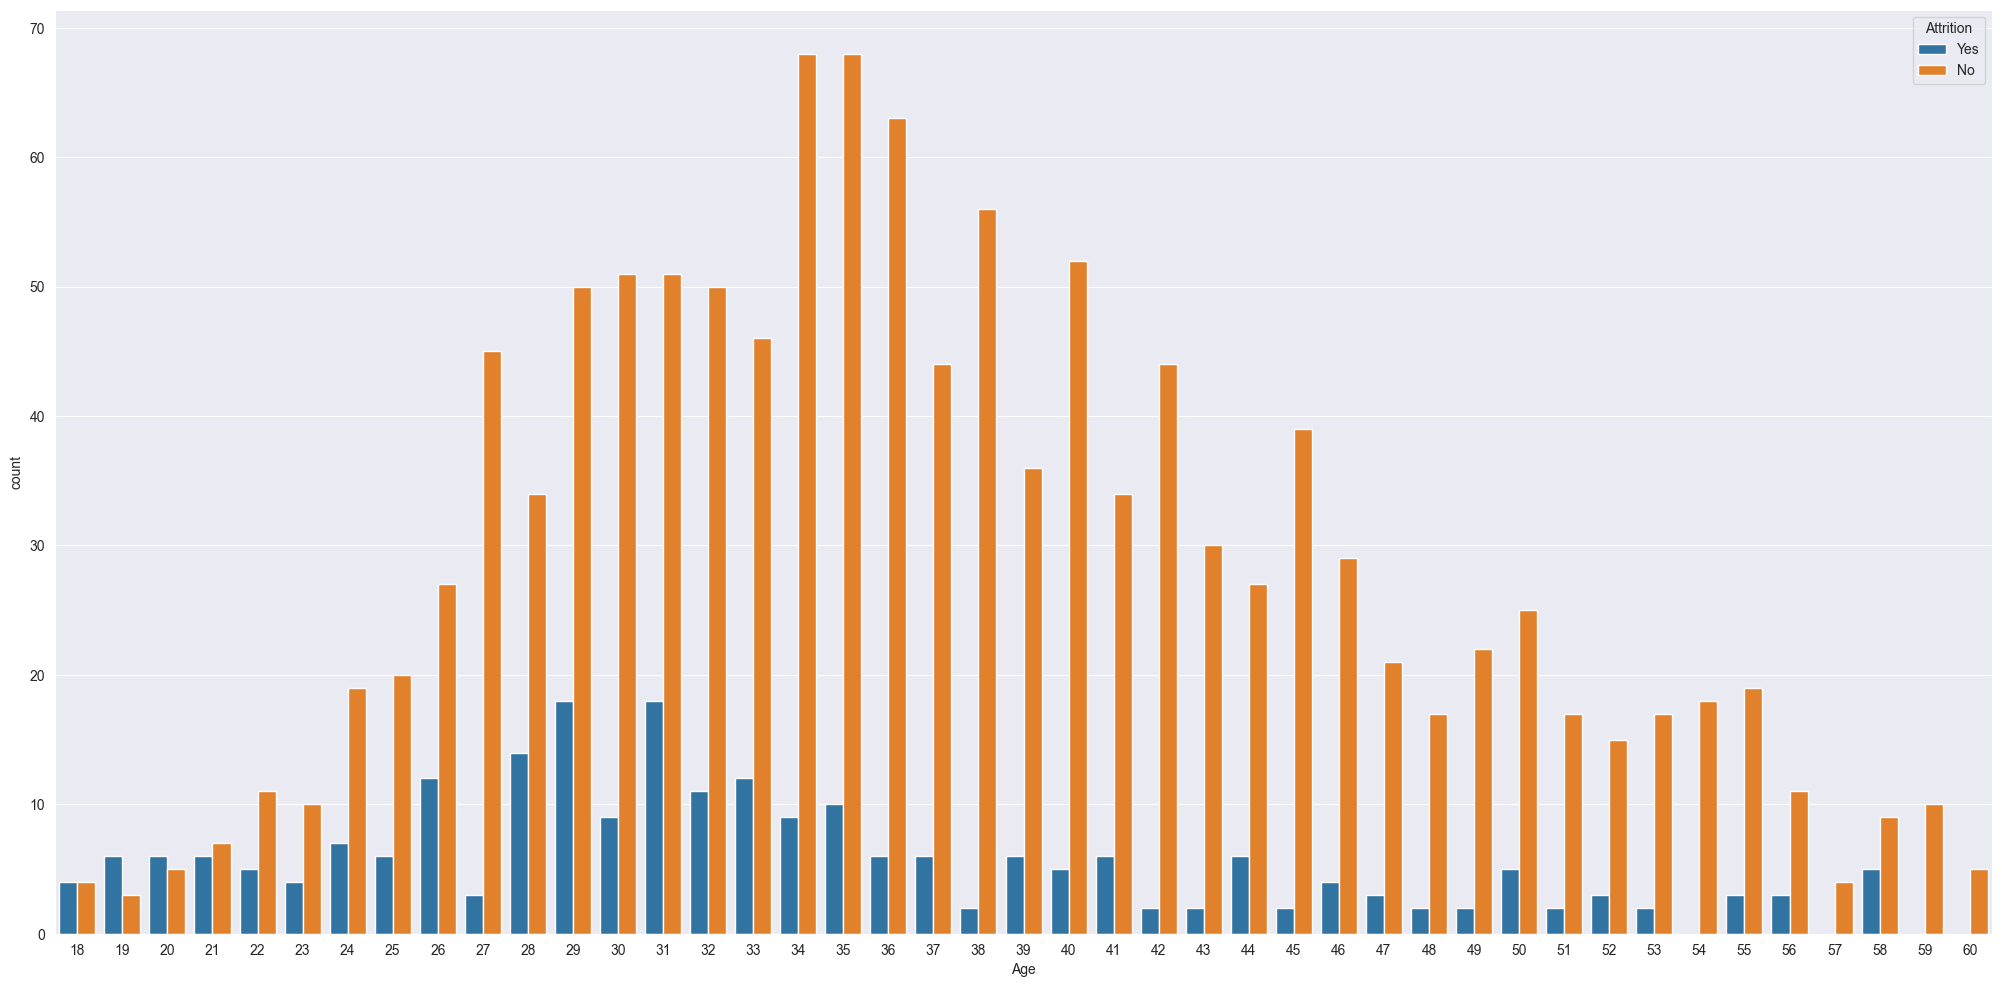

In [285]:
# Age x Attratition

plt.figure(figsize=(25, 12))
sns.countplot(x = 'Age', hue= 'Attrition', data = employee_df)

# 1 is the employees who left and 0 the ones that stayed
# Age is a factor important!

<Axes: xlabel='JobLevel', ylabel='count'>

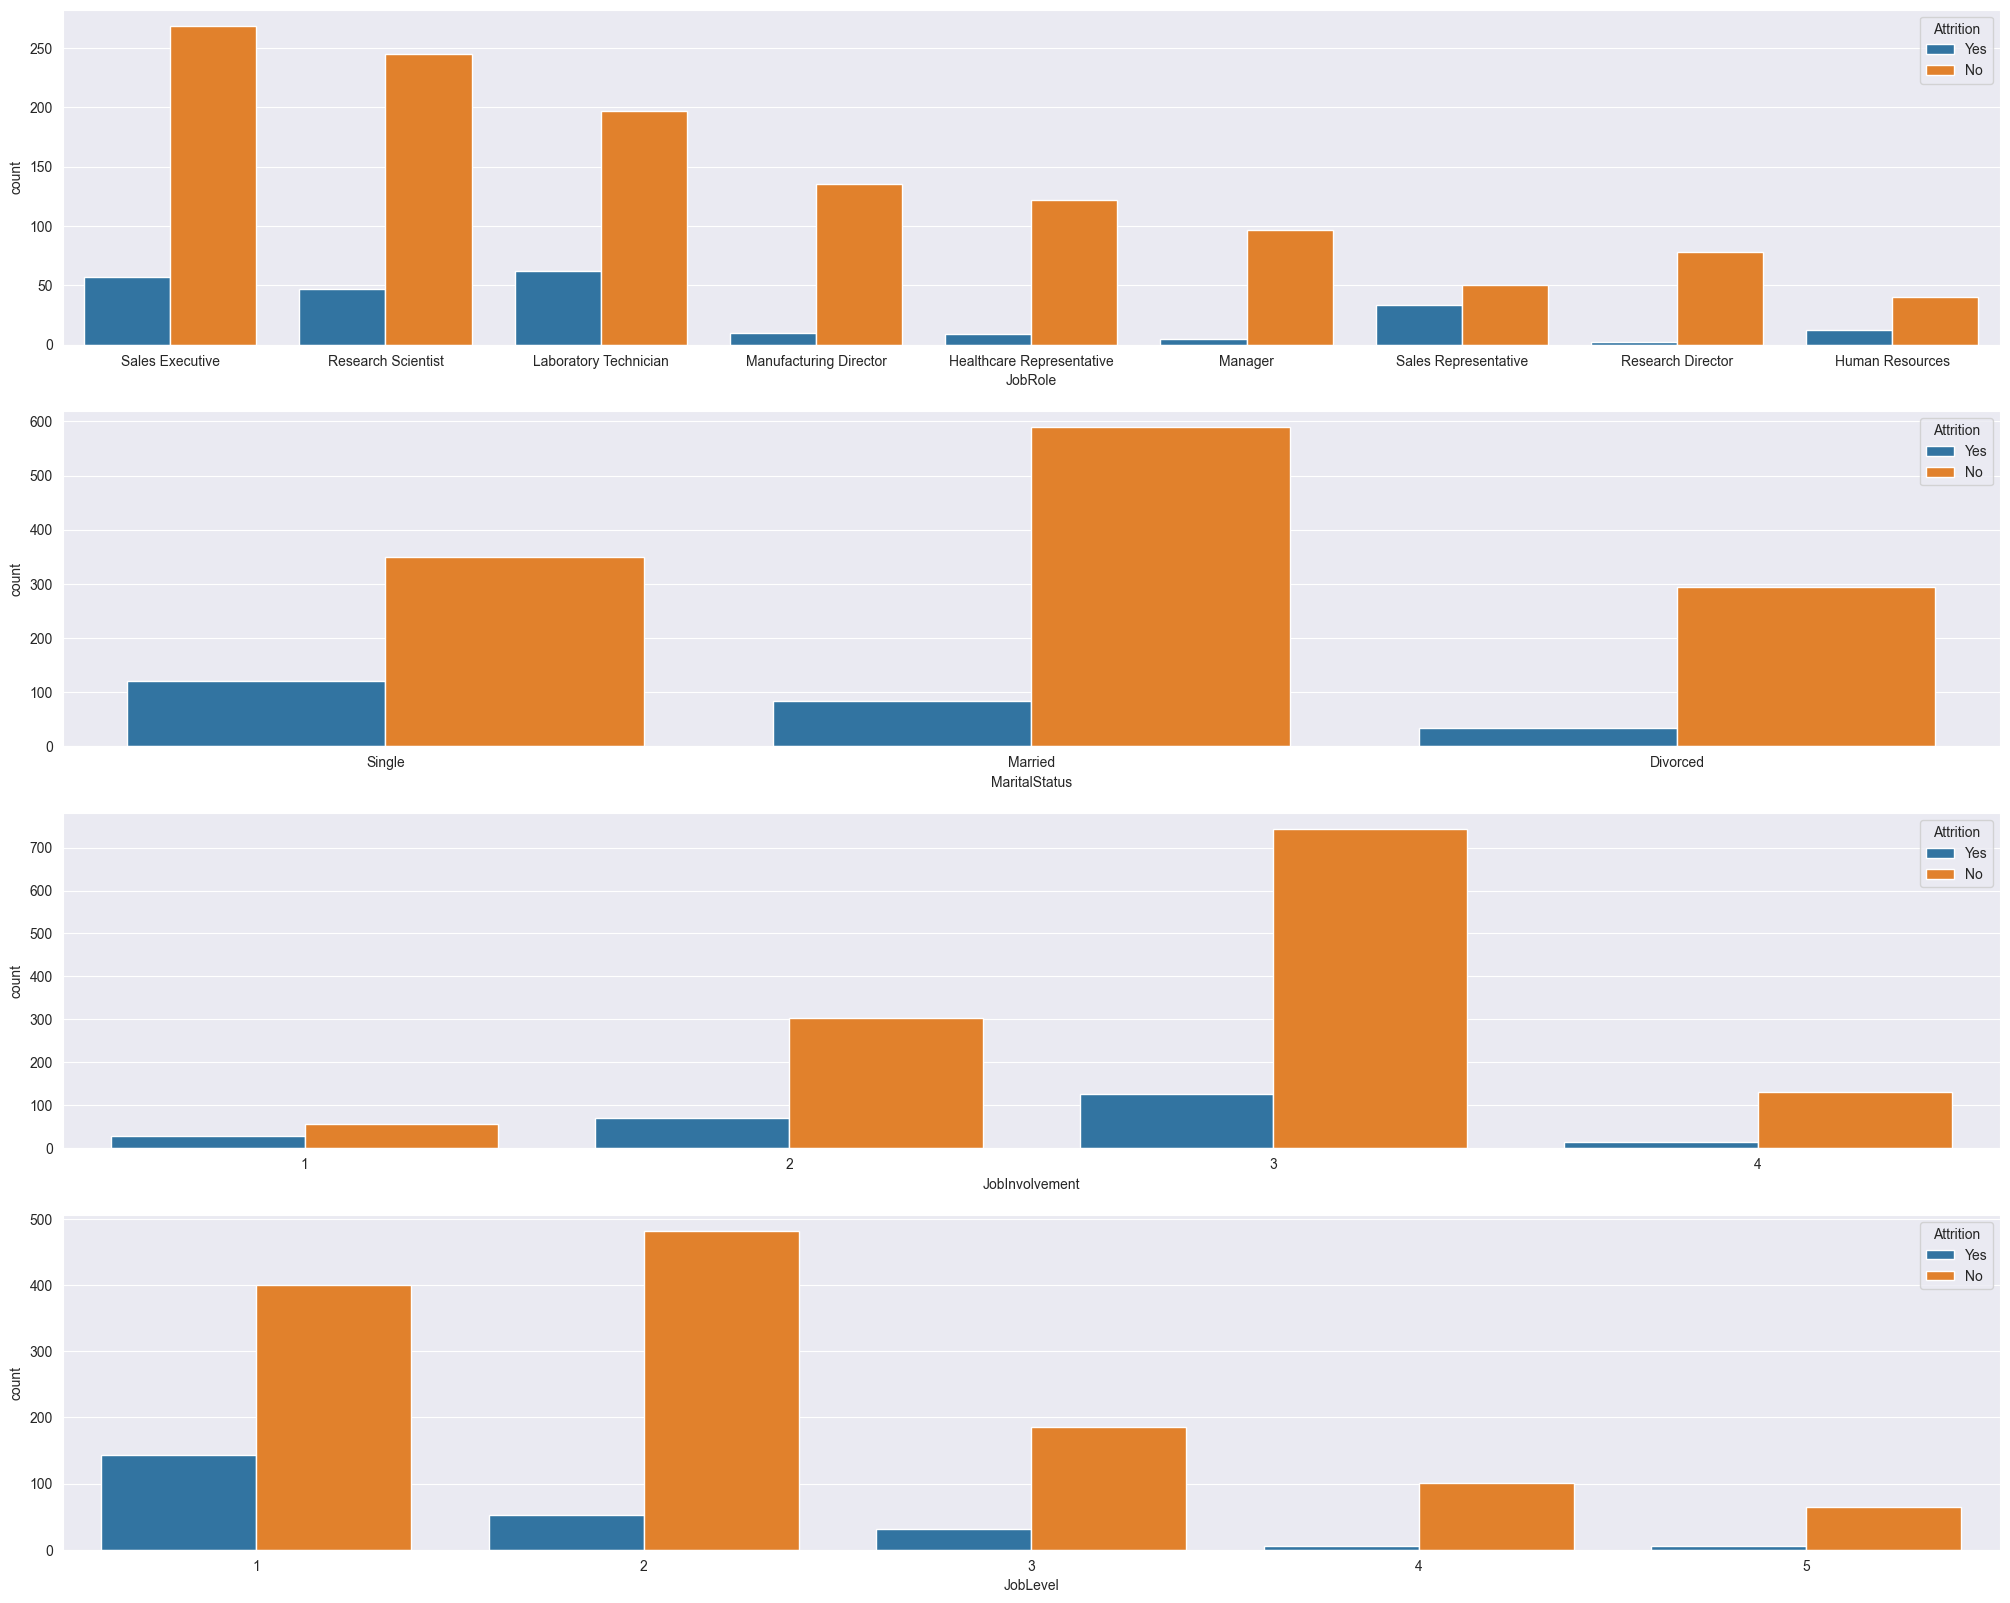

In [286]:
# Marital status, Job Roles, Job LV and Involvement
# Remember! Attrition = Employee loss / Turnover

employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
plt.figure(figsize=(25, 20))

plt.subplot(411)
sns.countplot(x = 'JobRole', hue= 'Attrition', data = employee_df)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue= 'Attrition', data = employee_df)

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue= 'Attrition', data = employee_df)

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue= 'Attrition', data = employee_df)

In [287]:
# Some finding:

"""
Jobs with high attrition rates:
- Human Resources (HR)
- Sales Representative
- Laboratory Technician

Single employees tend to have higher attrition rates.

Employees with Involvement Level 1 show high attrition, and as involvement increases, attrition decreases.

Employees at Job Level 1 experience high attrition, and as the Job Level increases, attrition decreases.
"""


'\nJobs with high attrition rates:\n- Human Resources (HR)\n- Sales Representative\n- Laboratory Technician\n\nSingle employees tend to have higher attrition rates.\n\nEmployees with Involvement Level 1 show high attrition, and as involvement increases, attrition decreases.\n\nEmployees at Job Level 1 experience high attrition, and as the Job Level increases, attrition decreases.\n'

Text(0.5, 0, 'Distance from Home')

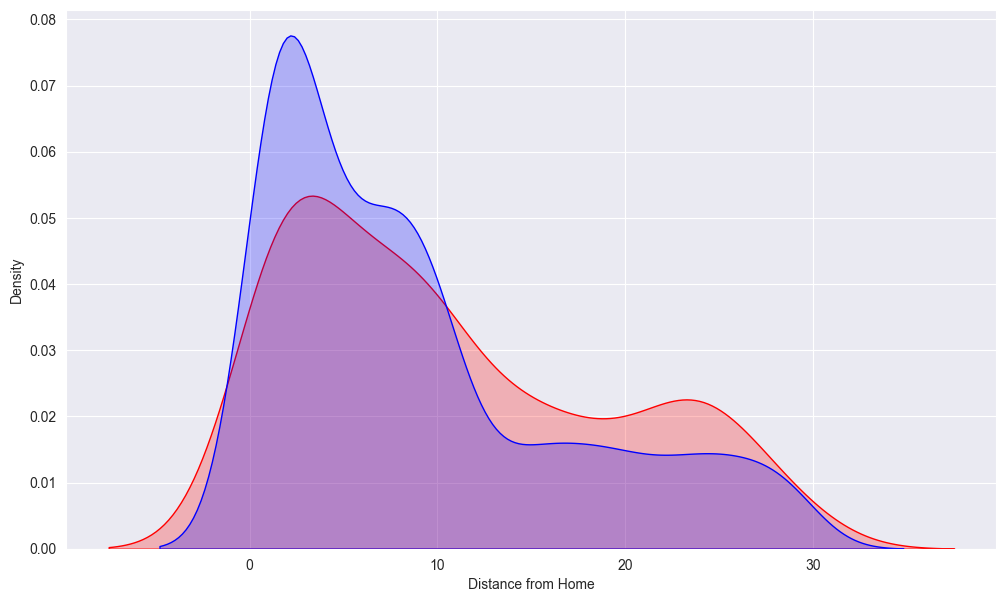

In [288]:
# KDE (Kernel Density Estimation) is a method to estimate and visualize the smooth distribution of continuous data.

plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', fill = True, color = 'r') #OBS: Shade is deprecated!
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who stayed', fill = True, color = 'b')

plt.xlabel('Distance from Home')


Text(0.5, 0, 'TotalWorkingYears')

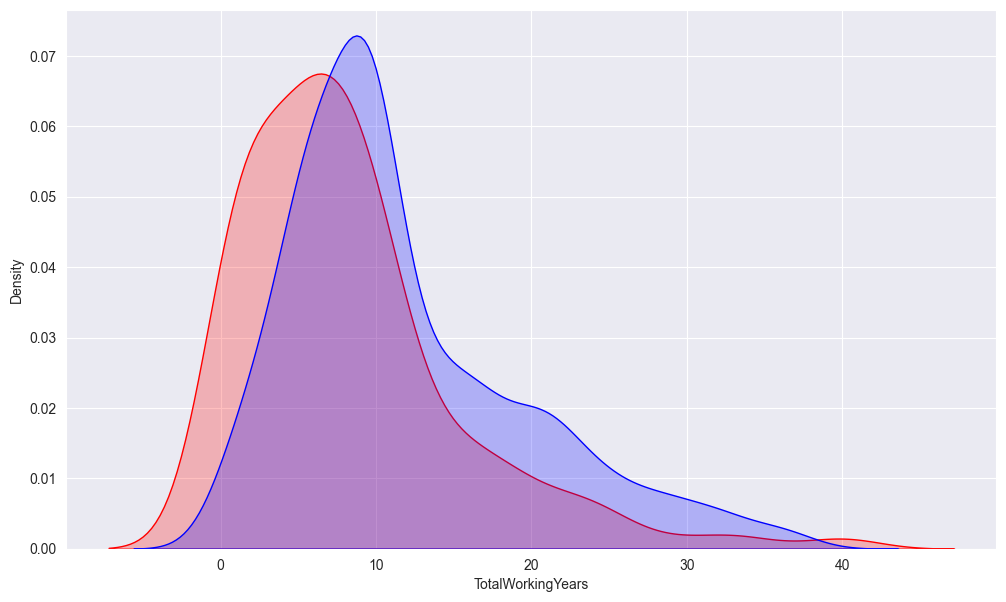

In [289]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', fill = True, color = 'r') #OBS: Shade is deprecated!
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who stayed', fill = True, color = 'b')

plt.xlabel('TotalWorkingYears')

Text(0.5, 0, 'Years With Current Manager')

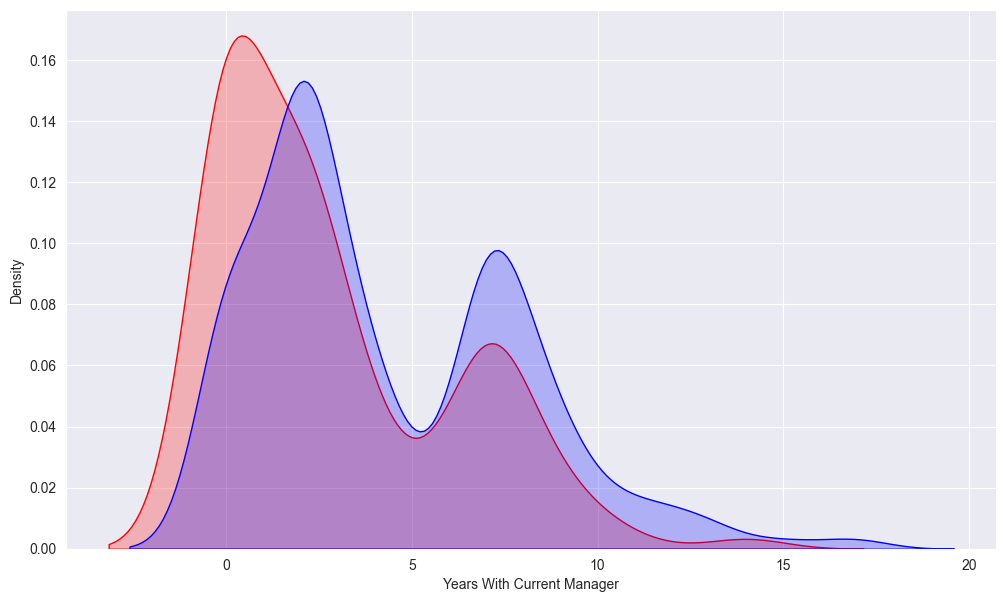

In [290]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', fill = True, color = 'r') #OBS: Shade is deprecated!
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who stayed', fill = True, color = 'b')

plt.xlabel('Years With Current Manager')

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

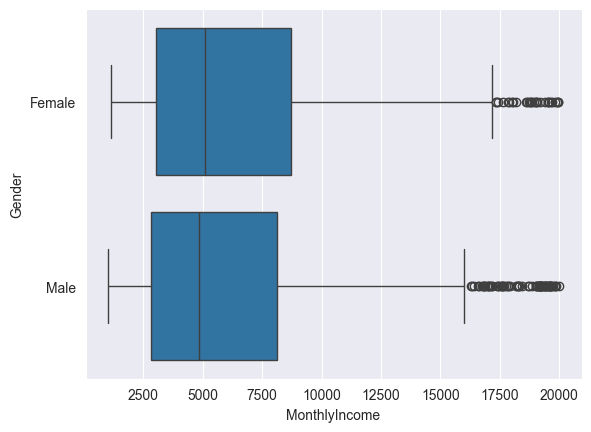

In [291]:
# Gender VS Monthly Income
# JobRole VS Monthly Income

sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)
# Genders receive mostly equal pay, with women earning slightly more on average.

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

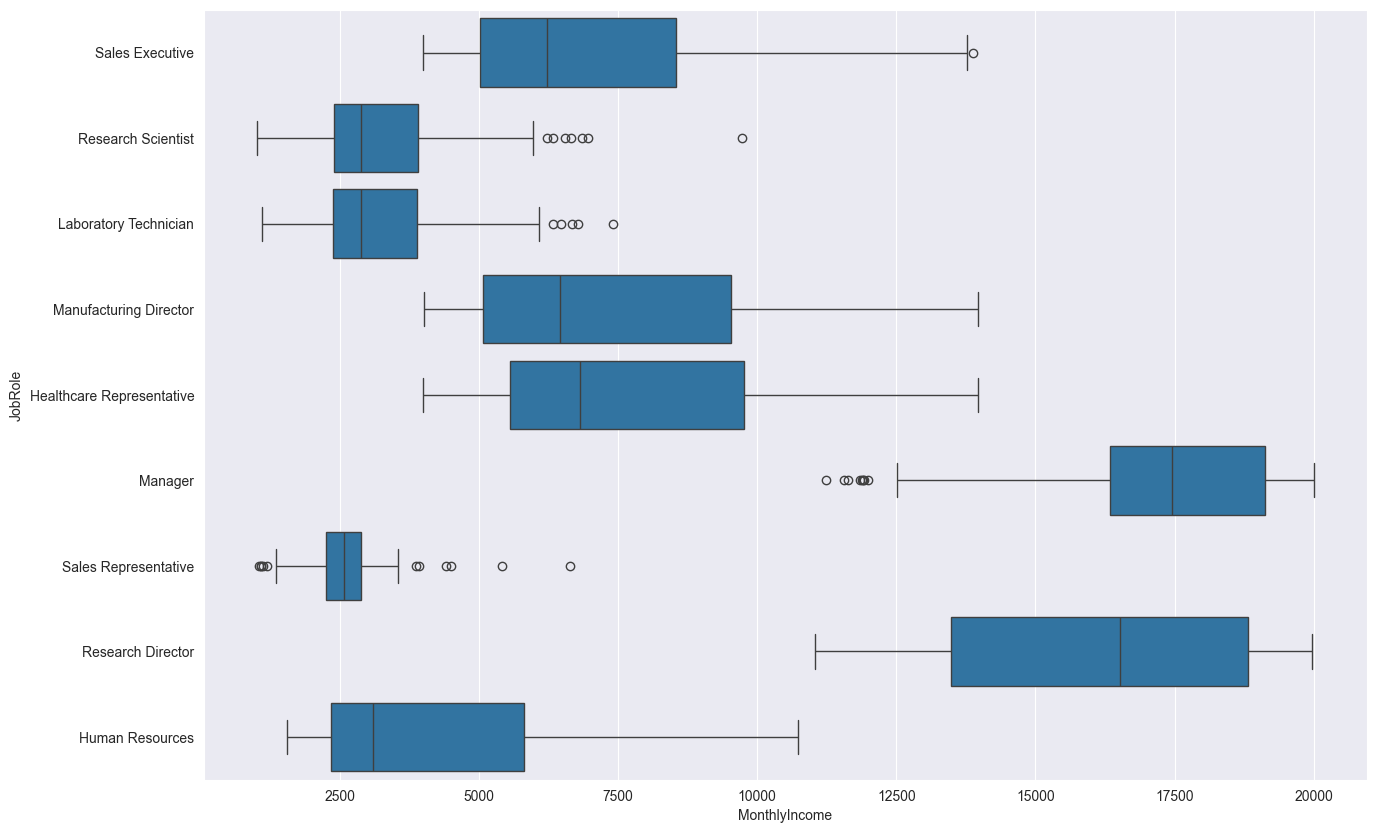

In [292]:

plt.figure(figsize=(15,10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

# The lowest-paying roles are Research Scientist, Lab Technician, HR, and Sales Representative.  The highest-paying roles are Manager and Research Director.  Mid-range salaries are found in Sales Executive, Manufacturing Director, and Healthcare Representative positions.


In [293]:
"""Data Pre Processing and cleaning"""

employee_df.tail(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [294]:
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]


In [295]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')

# Selecionando as colunas categóricas
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

# Criar o OneHotEncoder (Sem drop First)
onehotencoder = OneHotEncoder()  # Não vai remover a primeira coluna agora

# Aplicar a transformação e atualizar o X_cat diretamente
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [296]:
print(X_cat)

[[0. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


In [297]:
X_cat.shape

(1470, 26)

In [298]:
X_cat = pd.DataFrame(X_cat)

In [299]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [300]:
# All Numerical data
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')

X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

In [301]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [302]:
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [303]:
from sklearn.preprocessing import MinMaxScaler
X_all = X_all.astype(str)  # Converte todas as colunas para string



In [304]:
""" scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_all) """

' scaler = MinMaxScaler()\nX_scaled = scaler.fit_transform(X_all) '